# Naive Bayes Model
Version: Jun-2019

## Author - Priya Asokan

# Naïve Bayes 
As part of this assignment, try leveraging Naïve Bayes as a model for your independent project. As part of the modeling process, you might need to convert the data into categorical form to apply Naïve Bayes.

As a hint, if you have numerical attributes, use binning to convert them to categorical.

## Instructions
Note: Be sure to complete the lab exercise/s for this lesson before following these steps to complete your assignment.

Working with your Milestone project data, leverage Naïve Bayes algorithm  (Links to an external site.)to build a classification model.
1. Briefly summarize your findings on using Naïve Bayes.
2. Can you compare the accuracy of your Naïve Bayes model with the accuracy of your regression model in Milestone 3?

## Abstract
I have used House Sales in King county(USA) dataset.This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Source: https://www.kaggle.com/harlfoxem/housesalesprediction 

Google drive public link: https://drive.google.com/u/0/uc?id=11BG8_6jBiZMEyp4dGOt5vWsB6AY4-8l9&export=download

I have prepared the data and derived a correlation between the various feature variables and the response variable 'Price'. In this assignment I have build and evaluated a Naive Bayes classfication model to classify the house price by price greater than median and price less than median based on the features of this dataset.
## Problem
Using this dataset we build and evaluate a naive Bayes classification model to classify the house price as price greater than median and price less than median with various features like -sqft_living,Floors, bedrooms, bathrooms,grade, condition, waterfront , view, yr_built ,yr_renovated, zipcode etc.

## Conclusion
### Section 1-
1. Selected 5 best features for building a classification model by using univaraite feature selection for classification.(Bedrooms,Bathrooms, sqft_living,grade,sqft_above & sqft_living15) are the features with top scores.
2. House Price predictiction dataset consists of all numerical values.
3. Here in this assignment I am building both Gausian and Multinomial Naive Bayes to compare their results.
4. Accuracy for Gaussian Naive Bayes is 0.714 and accuracy for multinomial is 0.587
5. Comparing the results,Gausian Naive Bayes model gives higher accuracy since the dataset consists of all numerical values.
6. ROC curve and AUC values also shows the same.
### Section 2 -
No we cannot compare the results as performance metrics used for linear regression and classification are different.
The prediction values for regression are different from classification of labels for  classification model


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,mutual_info_classif

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [2]:
# Location of dataset
HousePrice = pd.read_csv(r'https://drive.google.com/u/0/uc?id=11BG8_6jBiZMEyp4dGOt5vWsB6AY4-8l9&export=download')
print(HousePrice.shape)
print(HousePrice.head())

(21613, 21)
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode    

## Data Preparation

In [3]:
# Drop the features that will not be used
HousePrice.drop(['id','lat','long','zipcode'],inplace = True,axis = 1)

# Get date from dateTime column value
HousePrice['date'] = pd.to_datetime(HousePrice['date'])

# Add a new new column 'House_age' by subtracting the built year from the house sold year
HousePrice['house_age'] = HousePrice['date'].dt.year - HousePrice['yr_built']
HousePrice.drop(['date','yr_built'],inplace = True,axis = 1)# Drop date column

HousePrice.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,28


In [4]:
#Convert renovated column to 0 and 1
HousePrice['renovated'] = HousePrice['yr_renovated'].apply(lambda x:0 if x == 0 else 1)
HousePrice.drop(['yr_renovated'],inplace = True,axis = 1)#Drop year renovated column

#Convert Sqft_Basement column to 0 and 1
HousePrice['sqft_basement'] = HousePrice['sqft_basement'].apply(lambda x:0 if x == 0 else 1)

In [5]:
# Get the median house Price 
median = np.median(HousePrice['price'])
# create an empty list - 'medianPrice'
medianPrice = []
for i in HousePrice.loc[:,'price'] :
    if i > median :        
        medianPrice.append('True')
    else:
         medianPrice.append('False')
#create a new column 'price_greaterThsn_median' and assign the values from medianPrice list
HousePrice['price_greaterThan_median'] = medianPrice

In [6]:
HousePrice.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated,price_greaterThan_median
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1690,7639,63,1,True
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1360,5000,49,0,True
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0,True


## Feature Selection for building a classification model

### Univaraite feature selection from f- test classification

In [7]:
# Target - classification label column
target = HousePrice['price_greaterThan_median']
# Select all the columns except for price and price greater than median
feature = HousePrice.drop(['price_greaterThan_median','price'],axis = 1)

In [8]:
# Use select K Best method to select the features needed for classification
get_univariate = SelectKBest(f_classif,k=6).fit(feature,target)
# Shows the features selected
feature_mask = get_univariate.get_support()
get_columns = feature.columns[feature_mask]

# select the feature columns
selected_features = feature[get_columns]
print(selected_features.head())
selected_features.describe()

   bedrooms  bathrooms  sqft_living  grade  sqft_above  sqft_living15
0         3       1.00         1180      7        1180           1340
1         3       2.25         2570      7        2170           1690
2         2       1.00          770      6         770           2720
3         4       3.00         1960      7        1050           1360
4         3       2.00         1680      8        1680           1800


,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,0.930062,0.770163,918.440897,1.175459,828.090978,685.391304
min,0.000000,0.000000,290.000000,1.000000,290.000000,399.000000
25%,3.000000,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,3.000000,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,4.000000,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,33.000000,8.000000,13540.000000,13.000000,9410.000000,6210.000000


#### Best features selected for classification  - Bedrooms,Bathrooms, sqft_living,grade,sqft_above & sqft_living15

In [9]:
# Convert 'price_greaterThan_median' column data type from object to category
HousePrice['price_greaterThan_median'] = HousePrice['price_greaterThan_median'].astype('object').astype(
    'category', category=['True', 'False'])

print(HousePrice.dtypes)

price                        float64
bedrooms                       int64
bathrooms                    float64
sqft_living                    int64
sqft_lot                       int64
floors                       float64
waterfront                     int64
view                           int64
condition                      int64
grade                          int64
sqft_above                     int64
sqft_basement                  int64
sqft_living15                  int64
sqft_lot15                     int64
house_age                      int64
renovated                      int64
price_greaterThan_median    category
dtype: object


## Build a classification Model

In [10]:
# Select the feature columns and target columns
x = HousePrice[['bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_living15']]
y = HousePrice['price_greaterThan_median']


### Multinomial Naive Bayes

In [11]:
# Divide the data into training and test data
x_train,x_test,y_train,y_test = train_test_split(x,y)

# Create the Multinomial Model using training data
MultiNB = MultinomialNB(alpha = 1)
MultiNB.fit(x_train,y_train)
print(MultiNB)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)


## Gaussian Naive Bayes

In [12]:
# Create the Gausian Model using training data
GausNB = GaussianNB()
GausNB.fit(x_train,y_train)
print(GausNB)

GaussianNB(priors=None, var_smoothing=1e-09)


## Model Evaluation

### Scores: Accuracy, Precision, Recall, F1 Score & Confusion Matrix

In [13]:
# Confusion matrix for true(actual) vs predicted results
def confusion_matrix(labels, predicted_labels, label_classes):
    return pd.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)    

#Test Model using standard accuracy measures
def performance(results,modelName):
    accuracy = metrics.accuracy_score(results['priceGreaterThanMedian'], results['predicted'])# calculate Accuracy measures
    precision = metrics.precision_score(results['priceGreaterThanMedian'], results['predicted'],pos_label='True')# calculate precision measure
    recall = metrics.recall_score(results['priceGreaterThanMedian'], results['predicted'],pos_label='True')# calculate recall measure
    f1Score = metrics.f1_score(results['priceGreaterThanMedian'], results['predicted'],pos_label='True')# calculate f1_score measure
    
    print(modelName)
    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1 Score = %3f' % (accuracy, precision, recall,f1Score))    
    print (confusion_matrix(results['priceGreaterThanMedian'], results['predicted'], results.priceGreaterThanMedian.cat.categories))

Gaussian Naive Bayes
Accuracy = 0.723, Precision = 0.792, Recall = 0.602, F1 Score = 0.683988
       False  True
False   2289   425
True    1071  1619
 
ROC curve for Gaussian Naive Bayes

TP rates: [0.   0.05 0.05 ... 1.   1.   1.  ]

FP rates: [0.   0.   0.   ... 0.99 0.99 1.  ]

Probability thresholds: [2. 1. 1. ... 0. 0. 0.]


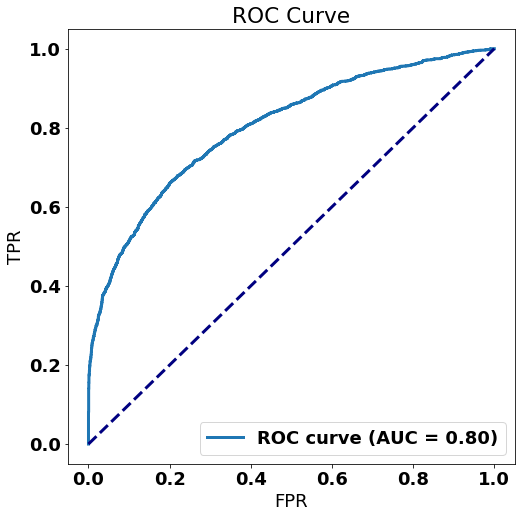

 
Multinomial Naive Bayes
Accuracy = 0.595, Precision = 0.613, Recall = 0.504, F1 Score = 0.553652
       False  True
False   1859   855
True    1333  1357
 
ROC curve for Multinomial Naive Bayes

TP rates: [0.   0.24 0.25 ... 1.   1.   1.  ]

FP rates: [0.   0.08 0.08 ... 1.   1.   1.  ]

Probability thresholds: [2. 1. 1. ... 0. 0. 0.]


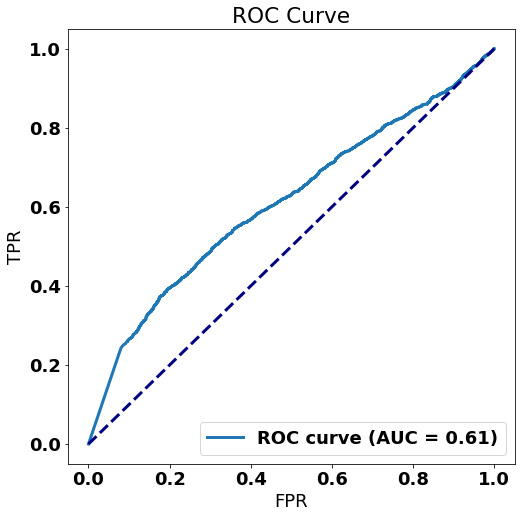

In [14]:
# Get predicted results for Naive Bayes models for Test data
def getPredictedValues(modelName,Title) :
    predicted_price_test = modelName.predict(x_test)# Predicted 'price_Greaterthan_median' values 
    price_probabilities_test = modelName.predict_proba(x_test)#  Probabilty scores for predicted values
    
    # create a datatframe 'results'
    results = pd.DataFrame({
        'priceGreaterThanMedian': y_test,
        'predicted': predicted_price_test,
        'proba(True)': price_probabilities_test[:, 0],
        'proba(False)': price_probabilities_test[:, 1],
    })
    
    performance(results,Title) # Get preformance scores
    print(" ")
    print('ROC curve for ' +  Title)
    fpr, tpr, th = roc_curve(y_test, price_probabilities_test[:, 1],pos_label='True') # ROC curve with AUC value
    AUC = auc(fpr, tpr) # calculate Area Under Curve value
    print ("\nTP rates:", np.round(tpr, 2))# Print true positive rate
    print ("\nFP rates:", np.round(fpr, 2))# Print false positive rate
    print ("\nProbability thresholds:", np.round(th, 2))# Print threshold values
    #Plot ROC curve with AUC value
    plt.rcParams["figure.figsize"] = [8, 8] # Square
    font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : 18}
    plt.rc('font', **font)
    plt.figure()
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
    plt.legend(loc="lower right")
    plt.show()

getPredictedValues(GausNB,'Gaussian Naive Bayes')
print(" ")
getPredictedValues(MultiNB,'Multinomial Naive Bayes')

Accuracy for Gausian Naive Bayes is higher when compared to multinomial Naive Bayes. AUC value is also higher for Gausian NB.